<a href="https://colab.research.google.com/github/Luissalamanca23/Fundamentos-ML/blob/main/1_4_2_Probabilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

Esta notebook fue creada originalmente como un blog post por Raúl E. López Briega en Matemáticas, análisis de datos y python. El contenido esta bajo la licencia BSD.

# INTRODUCCION

Las actividades que desarrollaremos en este laboratorio son las siguientes:


*   Revisar la Teoría de los Grandes Números en probabilidades
*   El Teorema del Límite Central


*   Ejemplo uno de probabilidad : la coincidencia de cumpleaños
*   Ejemplo dos de probabilidad : ¿qué puerta elegir?









In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(2131982) #para poder replicar el random

%matplotlib inline

# LEY DE GRANDES NÚMEROS:

Si se repite un experimento aleatorio, bajo las mismas condiciones, un número ilimitado de veces; y si estas repeticiones son independientes la una de la otra, entonces la frecuencia de veces que un evento A ocurra, convergerá con probabilidad 1 a un número que es igual a la probabilidad de que A ocurra en una sola repetición del experimento.

Un error que la gente suele cometer y asociar a esta ley, es la idea de que un evento tiene más posibilidades de ocurrir porque ha o no ha ocurrido recientemente. Esta idea de que las chances de un evento con una probabilidad fija, aumentan o disminuyen dependiendo de las ocurrencias recientes del evento, es un error que se conoce bajo el nombre de la **falacia del apostador**.


Utilicemos el ejemplo del lanzamiento de la moneda, en el primer ejemplo, la moneda va a tener la misma posibilidad de caer en cara o sello; mientras que en el segundo ejemplo, vamos a modificar la probabilidad de la moneda para que caiga cara solo en 1 de 6 veces.

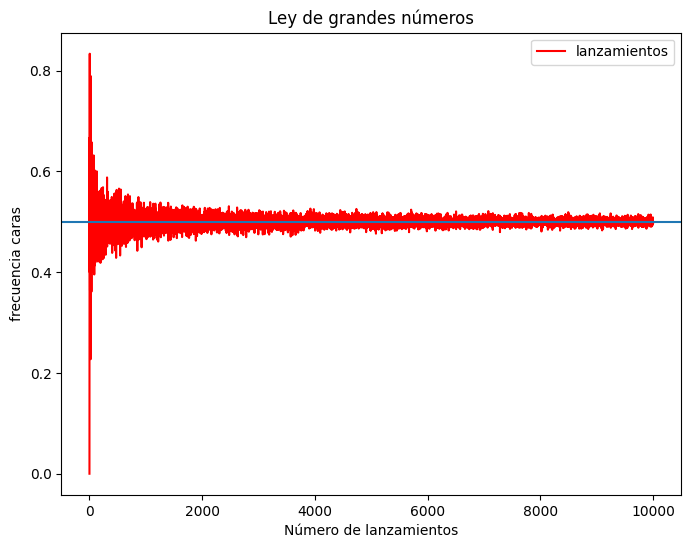

In [3]:

# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 seca=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos)
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

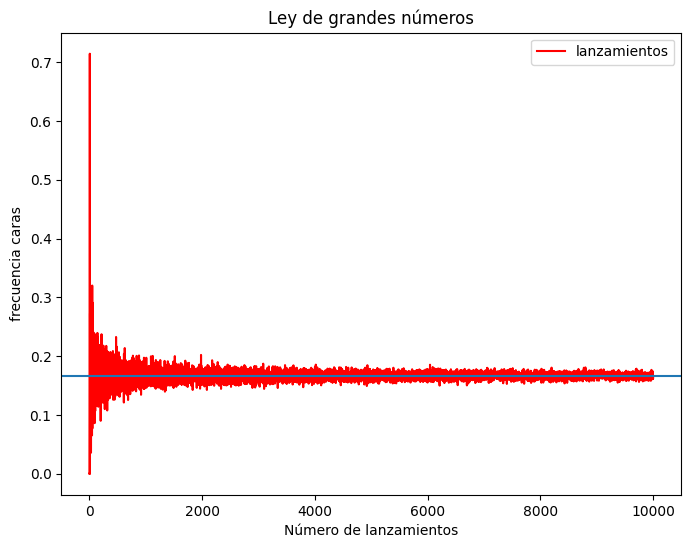

In [4]:
# moneda p=1/6 cara=1 seca=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6])
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

CONCLUSION: al comienzo, la frecuencia en que vamos obteniendo caras va variando considerablemente, pero a medida que aumentamos el número de repeticiones, la frecuencia de caras se va estabilizando en la probabilidad subyacente el evento, 1 de 2 (50%) para el primer caso y 1 de 6 para el segundo ejemplo (16%). En los gráficos podemos ver claramente el comportamiento de la ley.

EJERCICIO : prueba modicar la probilidad del segundo caso y ve que ocurre.

# LEY DEL LÍMITE CENTRAL:

Este teorema establece que la suma o el promedio de casi cualquier conjunto de variables independientes generadas al azar se aproximan a la Distribución Normal. El Teorema del límite central explica por qué la Distribución Normal surge tan comúnmente y por qué es generalmente una aproximación excelente para la media de casi cualquier colección de datos.

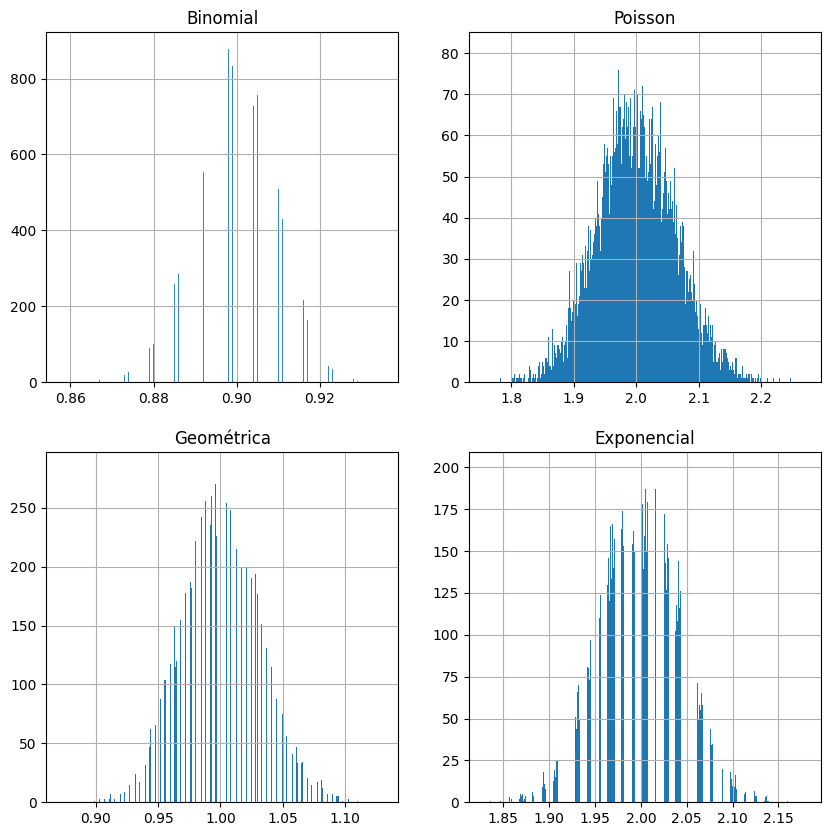

In [5]:

# Ejemplo teorema del límite central
muestra_binomial = []
muestra_exp = []
muestra_possion = []
muestra_geometric = []
mu = .9
lam = 1.0
size=1000

for i in range(1,20000):
    muestra = np.random.binomial(1, mu, size=size)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=size)
    muestra_exp.append(muestra.mean())
    muestra = np.random.geometric(p=.5, size=size)
    muestra_geometric.append(muestra.mean())
    muestra = np.random.poisson (lam=lam, size=size)
    muestra_possion.append(muestra.mean())

df = pd.DataFrame({ 'binomial' : muestra_binomial,
                     'poission' : muestra_possion,
                     'geometrica' : muestra_geometric,
                    'exponencial' : muestra_exp})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df.binomial.hist(ax=axes[0,0], alpha=0.9, bins=1000)
df.exponencial.hist(ax=axes[0,1],bins=1000)
df.poission.hist(ax=axes[1,0],bins=1000)
df.geometrica.hist(ax=axes[1,1],bins=1000)

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geométrica')
axes[1,1].set_title('Exponencial')
plt.show()

# CONCLUSION

Al graficar la distribución de las medias de las distribuciones Binomial, Poisson, Geométrica y Exponencial; vemos que todas ellas responden a la famosa forma de campana de la Distribución Normal!

# LA COINCIDENCIA DE CUMPLEAÑOS

 ¿Cuál es la probabilidad de que, en un grupo de personas elegidas al azar, al menos dos de ellas habrán nacido el mismo día del año? ¿Cuántas personas son necesarias para asegurar una probabilidad mayor al 50%?. Excluyendo el 29 de febrero de nuestros cálculos y asumiendo que los restantes 365 días de posibles cumpleaños son igualmente probables, nos sorprendería darnos cuenta de que, en un grupo de sólo 23 personas, la probabilidad de que dos personas compartan la misma fecha de cumpleaños es mayor al 50%!.

Supongamos que el grupo sólo tiene una persona, en ese caso, hay una probabilidad del 100% que esta persona no comparte un cumpleaños puesto que no hay nadie más quien compartir. Pero ahora podemos añadir una segunda persona al grupo. ¿Cuáles son las posibilidades de que tenga un cumpleaños diferente de esa persona? De hecho esto es bastante fácil, hay 364 otros días en el año, así que las posibilidades son 364/365. ¿Qué tal si agregamos una tercera persona al grupo? Ahora hay 363/365 días. Para obtener la probabilidad general de que no hay cumpleaños compartidos simplemente multiplicamos las probabilidades individuales.

In [6]:

# Ejemplo situación 2 La coincidencia de cumpleaños
prob = 1.0
asistentes = 50

for i in range(asistentes):
    prob = prob * (365-i)/365

print("Probabilidad de que compartan una misma fecha de cumpleaños es {0:.2f}"
      .format(1 - prob))

Probabilidad de que compartan una misma fecha de cumpleaños es 0.97


EJERCICIO : prueba con más asistentes y con menos asistentes al cumpleaños. ¿Qué tipo de probabilidad se aplica en este ejercicio?

# ¿QUÉ PUERTA ELEGIR?

Este es un famoso juego de programas de TV. Se trata de elegir entre tres puertas, de las cuales una esconde un premio. Intuitivamente, es bastante sencillo que nuestra elección original (cuando hay tres puertas para elegir) tiene una probabilidad de 1/3 de ganar el concurso. Las cosas sin embargo se complican, cuando se descarta una puerta. Muchos dirían que ahora tenemos una probabilidad de 1/2 de ganar, seleccionando cualquiera de las dos puertas; pero este no es el caso. Un aspecto crítico del problema es darse cuenta de que la elección de la puerta a descartar por el Animador, no es una decisión al azar. El Animador puede descartar una puerta porque él sabe (a) qué puerta hemos seleccionado y (b) qué puerta tiene el premio. De hecho, en muchos casos, el presentador debe quitar una puerta específica. Por ejemplo, si seleccionamos la puerta 1 y el premio está detrás de la puerta 3, el presentador no tiene otra opción que retirar la puerta 2. Es decir, que **la elección de la puerta a descartar está condicionada tanto por la puerta con el premio como por la puerta que seleccionamos inicialmente**. Este hecho, cambia totalmente la naturaleza del juego, y hace que las probabilidades de ganar sean 2/3 si cambiamos de puerta!.


In [7]:
#
# <!-- collapse=True -->
# Ejemplo situación 2 ¿Que puerta elegir? (el problema Monty Hall)
def elegir_puerta():
    """
    Función para elegir una puerta. Devuelve 1, 2, o 3 en forma aleatoria.
    """
    return np.random.randint(1,4)


class MontyHall:
    """
    Clase para modelar el problema de Monty Hall.
    """
    def __init__(self):
        """
        Crea la instancia del problema.
        """
        # Elige una puerta en forma aleatoria.
        self.puerta_ganadora = elegir_puerta()
        # variables para la puerta elegida y la puerta descartada
        self.puerta_elegida = None
        self.puerta_descartada = None

    def selecciona_puerta(self):
        """
        Selecciona la puerta del concursante en forma aleatoria.
        """
        self.puerta_elegida = elegir_puerta()

    def descarta_puerta(self):
        """
        Con este método el presentador descarta una de la puertas.
        """
        # elegir puerta en forma aleatoria .
        d = elegir_puerta()
        # Si es al puerta ganadora o la del concursante, volver a elegir.
        while d == self.puerta_ganadora or d == self.puerta_elegida:
            d = elegir_puerta()
        # Asignar el valor a puerta_descartada.
        self.puerta_descartada = d



    def cambiar_puerta(self):
        """
        Cambia la puerta del concursante una vez que se elimino una puerta.
        """
        # 1+2+3=6. Solo existe una puerta para elegir.
        self.puerta_elegida = 6 - self.puerta_elegida - self.puerta_descartada

    def gana_concursante(self):
        """
        Determina si el concursante gana.
        Devuelve True si gana, False si pierde.
        """
        return self.puerta_elegida == self.puerta_ganadora


    def jugar(self, cambiar=True):
        """
        Una vez que la clase se inicio, jugar el concurso.

        'cambiar' determina si el concursante cambia su elección.
        """
        # El concursante elige una puerta.
        self.selecciona_puerta()
        # El presentador elimina una puerta.
        self.descarta_puerta()
        # El concursante cambia su elección.
        if cambiar:
            self.cambiar_puerta()
        # Determinar si el concursante ha ganado.
        return self.gana_concursante()

In [8]:
# Ahora, jugamos el concurso. primero nos vamos a quedar con nuestra elección
# inicial. Vamos a ejecutar el experimiento 10.000 veces.
gana, pierde = 0, 0
for i in range(10000):
    # Crear la instancia del problema.
    s2 = MontyHall()
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=False):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)

print("\n10.000 concursos sin cambiar de puerta:")
print("  gana: {0:} concursos".format(gana))
print("  pierde: {0:} concursos".format(pierde))
print("  probabilidad: {0:.2f} procentaje de victorias".format(porc_gana))


10.000 concursos sin cambiar de puerta:
  gana: 3311 concursos
  pierde: 6689 concursos
  probabilidad: 33.11 procentaje de victorias


In [10]:
# Ahora, jugamos el concurso siempre cambiando la elección inicial
# Vamos a ejecutar el experimiento 10.000 veces.
gana, pierde = 0, 0
for i in range(10000):
    # Crear la instancia del problema.
    s2 = MontyHall()
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=True):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)

print("\n10.000 concursos cambiando de puerta:")
print("  gana: {0:} concursos".format(gana))
print("  pierde: {0:} concursos".format(pierde))
print("  probabilidad: {0:.1f} procentaje de victorias".format(porc_gana))


10.000 concursos cambiando de puerta:
  gana: 6731 concursos
  pierde: 3269 concursos
  probabilidad: 67.3% de victorias


CONCLUSION : Como esta simulación lo demuestra, si utilizamos la estrategia de siempre cambiar de puerta, podemos ganar el concurso un 66% de las veces; mientras que si nos quedamos con nuestra elección inicial, solo ganaríamos el 33% de las veces.

EJERCICIO: ¿qué tipo de probabilidad se ocupó acá? intenta mejorar la probabilidad de ganar

RESPUESTA: estimación de la probabilidad de tipo frecuentista